In [87]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn import set_config
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
# read 2 datasets
calories = pd.read_csv('calories.csv')
exercises = pd.read_csv('exercise.csv')

In [5]:
# fetch the first 5 rows of the calories dataset
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
# fetch the first 5 rows of the exercises dataset
exercises.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
# merge 2 datasets
merged_dataset = pd.merge(calories, exercises, on= 'User_ID')

In [8]:
# fetch the first 5 of the dataset
merged_dataset.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
# check the size of the merged dataset
merged_dataset.shape

(15000, 9)

In [10]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
# stats of the merged dataset
merged_dataset.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [12]:
# null check
merged_dataset.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [11]:
# missing value check
merged_dataset.isna().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [13]:
# check all the features of the dataset
merged_dataset.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [97]:
merged_dataset.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


# Data Visualization

In [14]:
# set aesthetic param for seaborn
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

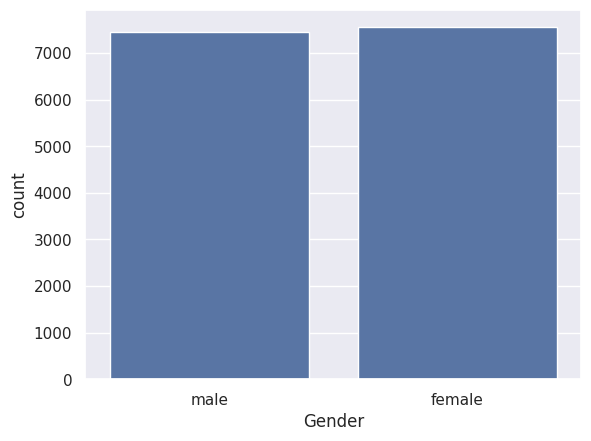

In [15]:
# count
sns.countplot(x= merged_dataset['Gender'])

<Axes: xlabel='Age', ylabel='Density'>

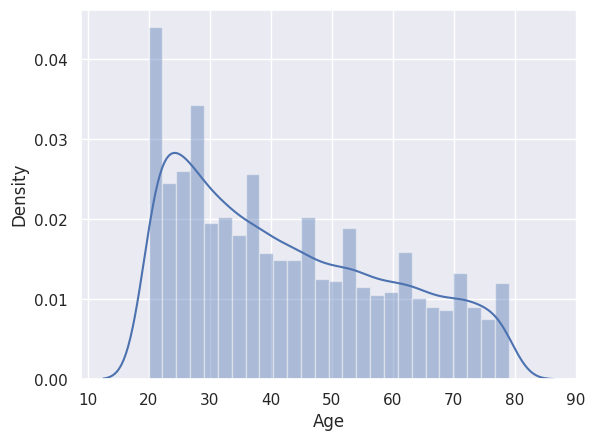

In [16]:
# distribution of age
sns.distplot(merged_dataset['Age'])

<Axes: xlabel='Height', ylabel='Density'>

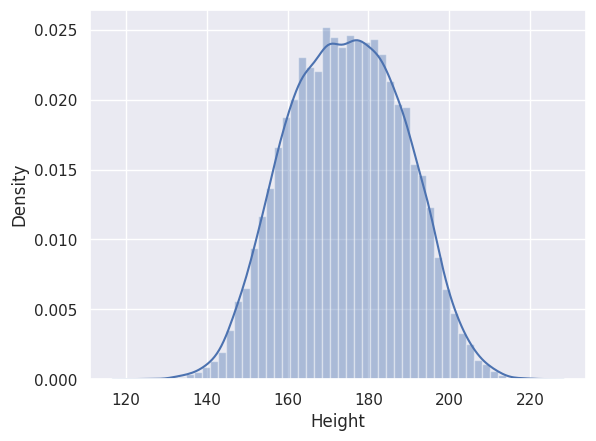

In [17]:
# distribution of height
sns.distplot(merged_dataset['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

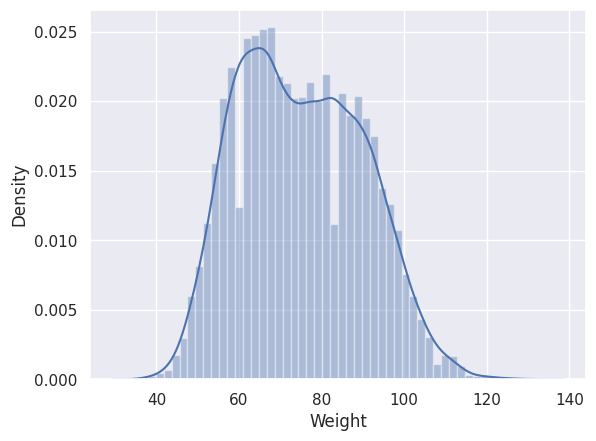

In [18]:
# distribution of weight
sns.distplot(merged_dataset['Weight'])

# Dataset Correlation

In [19]:
correlation = merged_dataset.corr(numeric_only=True)

<Axes: >

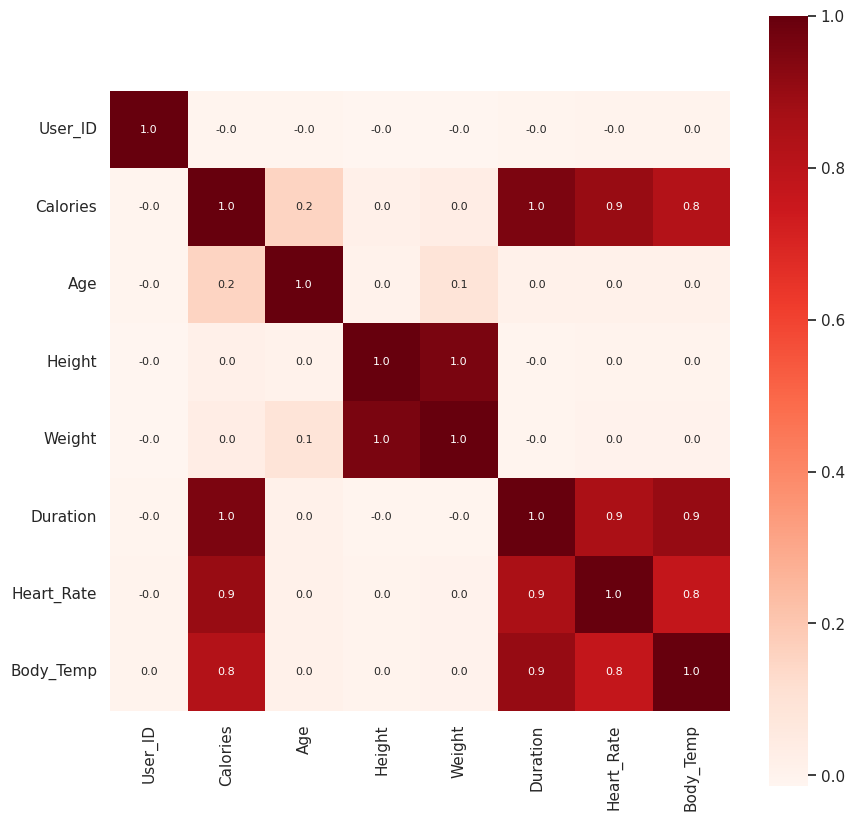

In [20]:
# heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [21]:
# convert data to numerical value, F to 1 and M to 0
merged_dataset.replace({"Gender":{'female':1, 'male':0}})


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,1,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,1,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,1,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,0,78,193.0,97.0,2.0,84.0,38.3


# Separate the Data from the Dataframe

In [22]:
# function to separate the target column and the rest
def separate_features(target_data, column):
  X = target_data.drop(columns=[column], axis=1)
  Y = target_data[column]
  return X,Y

X, Y = separate_features(merged_dataset, 'Calories')


In [23]:
X = X.drop(columns=['User_ID'])

In [24]:
# the rest of the dataset except the Calories column
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0        male   68   190.0    94.0      29.0       105.0       40.8
1      female   20   166.0    60.0      14.0        94.0       40.3
2        male   69   179.0    79.0       5.0        88.0       38.7
3      female   34   179.0    71.0      13.0       100.0       40.5
4      female   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995  female   20   193.0    86.0      11.0        92.0       40.4
14996  female   27   165.0    65.0       6.0        85.0       39.2
14997  female   43   159.0    58.0      16.0        90.0       40.1
14998    male   78   193.0    97.0       2.0        84.0       38.3
14999    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [55]:
# replace string to int in gender 0 is M, 1 is F
X = X.replace({"Gender":{'female':1, 'male':0}})

In [56]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [25]:
# calories column
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


# Train Test Split

In [57]:
# # perform train test split on the dataset
# def do_train_test_split(X, Y, test_size=0.20, random_state= 2):
#   X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state)
#   return X_train, X_test, Y_train, Y_test

In [66]:
X_train,X_test, Y_train,  Y_test = train_test_split(X,Y,test_size=0.20, random_state= 2)

In [67]:
print(X.shape, X_train.shape ,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [60]:
print(Y_train.shape)

(3000, 7)


# Column Transformer and Pipeline

In [70]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(), ['Gender']),
    ('num', StandardScaler(), ['Age','Height','Weight','Duration', 'Heart_Rate','Body_Temp'])
], remainder='passthrough')

In [71]:
pipeline = Pipeline([("preprocessor", preprocessor),("model", LinearRegression())])

In [72]:
set_config(display='diagram')

In [73]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [76]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [77]:
Y_prediction = pipeline.predict(X_test)

In [80]:
r2_score(Y_test, Y_prediction)

0.9668790377181355

In [81]:
kfold = KFold(n_splits=5, shuffle=True, random_state=2)

In [82]:
results = cross_val_score(pipeline, X, Y, cv=kfold, scoring='r2')

In [83]:
results.mean()

0.9671716327277787

In [88]:
mean_absolute_error(Y_test, Y_prediction)

8.385188053147177

# Models Evaluation

In [89]:
def model_evaluation(model_type, model):
  result =[]
  result.append(model_type)
  pipeline = Pipeline([("preprocessor", preprocessor),("model", model)])
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state= 2)
  pipeline.fit(X_train, Y_train)
  Y_prediction = pipeline.predict(X_test)
  result.append(r2_score(Y_test, Y_prediction))
  result.append(mean_absolute_error(Y_test, Y_prediction))
  kfold = KFold(n_splits=5, shuffle=True, random_state=2)
  cv_results = cross_val_score(pipeline, X, Y, cv=kfold, scoring='r2')
  result.append(cv_results.mean())
  return result

In [90]:
models = {
    'lr': LinearRegression(),
    'xgb': XGBRegressor(),
    'rf': RandomForestRegressor()
}

In [92]:
model_result = []
for name, mod in models.items():
  model_result.append(model_evaluation(name, mod))

In [93]:
print(model_result)

[['lr', 0.9668790377181355, 8.385188053147177, 0.9671716327277787], ['xgb', 0.998800624504713, 1.4833678883314132, 0.9988636980050971], ['rf', 0.9982223674153919, 1.6715466666666672, 0.997922937965747]]


In [94]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(), ['Gender']),
    ('num', StandardScaler(), ['Age','Height','Weight','Duration', 'Heart_Rate','Body_Temp'])
], remainder='passthrough')

In [95]:
pipeline = Pipeline([("preprocessor", preprocessor),("model", XGBRegressor())])

In [96]:
pipeline.fit(X, Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

# Sample Data and Prediction

In [100]:
# male is 0, female is 1
# sample 1
sample_data = pd.DataFrame({
    'Gender':0,
    'Age':68,
    'Height':190.0,
    'Weight': 94.0,
    'Duration': 29.0,
    'Heart_Rate': 105.0,
    'Body_Temp': 40.8
}, index=[0])


In [101]:
pipeline.predict(sample_data)

array([231.0721], dtype=float32)

In [104]:
# sample 2
sample_data2 = pd.DataFrame({
    'Gender':1,
    'Age':20,
    'Height':166.0,
    'Weight': 60.0,
    'Duration': 14.0,
    'Heart_Rate': 94.0,
    'Body_Temp': 40.3
}, index=[0])
# 66.0	female	20	166.0	60.0	14.0	94.0	40.3

In [106]:
pipeline.predict(sample_data2)

array([65.59906], dtype=float32)